# Groupby

# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# first install: pip install version_information
%reload_ext version_information
%version_information numpy, pandas,matplotlib

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
numpy 1.16.0
pandas 0.24.1
matplotlib 3.0.2
Sun Oct 06 18:23:28 2019 W. Europe Daylight Time

# 2)- Loading data file

In [4]:
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [5]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
temperature,int64
windspeed,int64
day,object
city,object
event,object


In [6]:
df.shape

(12, 5)

In [7]:
df.day.unique()

array(['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017'], dtype=object)

In [8]:
# convert to date-time
df['day']=pd.to_datetime(df['day'])

In [9]:
table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
day,datetime64[ns]
temperature,int64
windspeed,int64
city,object
event,object


**windspeed**

In [10]:
df['windspeed'].unique()

array([ 6,  7, 12,  5, 15, 20, 13,  8, 10], dtype=int64)

Text(0, 0.5, 'Count')

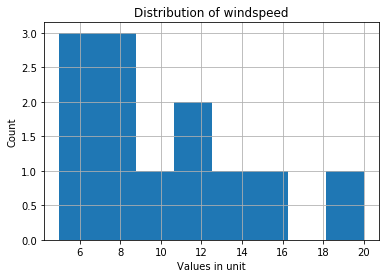

In [11]:
# distribution of the variable

fig = df.windspeed.hist(bins=8)
fig.set_title('Distribution of windspeed')
fig.set_xlabel('Values in unit')
fig.set_ylabel('Count')

In [12]:
df['temperature'].unique()

array([32, 36, 28, 33, 90, 85, 87, 92, 45, 50, 54, 42], dtype=int64)

Text(0, 0.5, 'Count')

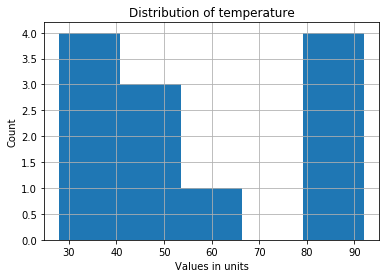

In [13]:
# distribution of the variable

fig = df.temperature.hist(bins=5)
fig.set_title('Distribution of temperature')
fig.set_xlabel('Values in units')
fig.set_ylabel('Count')

In [14]:
df.city.unique()

array(['new york', 'mumbai', 'paris'], dtype=object)

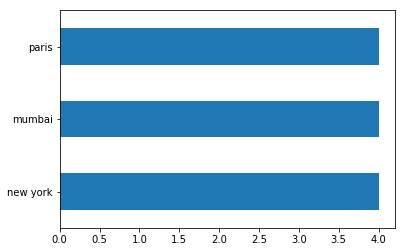

In [15]:
df.city.value_counts().plot(kind='barh')

In [16]:
df.event.unique()

array(['Rain', 'Sunny', 'Snow', 'Fog', 'Cloudy'], dtype=object)

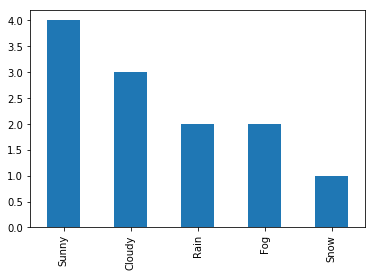

In [17]:
df.event.value_counts().plot(kind='bar')

# 3)- Analysis 

- 1.What was the maximum temperature in each of these 3 cities?
- 2.What was the average windspeed in each of these 3 cities?


In [18]:
g = df.groupby("city")
g

In [19]:
for city, data in g:
    print("\n")
    print("city:",city)
    print("\n")
    print("data:",data)   



city: mumbai


data:          day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-01-02  mumbai           85         12    Fog
6 2017-01-03  mumbai           87         15    Fog
7 2017-01-04  mumbai           92          5   Rain


city: new york


data:          day      city  temperature  windspeed  event
0 2017-01-01  new york           32          6   Rain
1 2017-01-02  new york           36          7  Sunny
2 2017-01-03  new york           28         12   Snow
3 2017-01-04  new york           33          7  Sunny


city: paris


data:           day   city  temperature  windspeed   event
8  2017-01-01  paris           45         20   Sunny
9  2017-01-02  paris           50         13  Cloudy
10 2017-01-03  paris           54          8  Cloudy
11 2017-01-04  paris           42         10  Cloudy


**SQL query**<br>

SELECT * from weather_data GROUP BY city

In [20]:
g.get_group('paris')

,day,city,temperature,windspeed,event
8,2017-01-01,paris,45,20,Sunny
9,2017-01-02,paris,50,13,Cloudy
10,2017-01-03,paris,54,8,Cloudy
11,2017-01-04,paris,42,10,Cloudy


**a)-maximum temperature in each of these 3 cities**

In [21]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-01-04,92,15,Sunny
new york,2017-01-04,36,12,Sunny
paris,2017-01-04,54,20,Sunny


In [22]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [23]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-01-01,85,5,Fog
new york,2017-01-01,28,6,Rain
paris,2017-01-01,42,8,Cloudy


**b)-average windspeed in each of these 3 cities**

In [24]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [25]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [26]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [27]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


In [28]:
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [29]:
#g.plot()
#plt.xlabel('distribution')
#plt.ylabel('Value in given unit')
#plt.title('Distribution of Temperature and windspeed in three cities ')
#plt.legend()
#plt.show()

# 4)-custom function

- Days when temperature was between 80 and 90
- Days when it was between 50 and 60
- Days when it was anything else

In [30]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [31]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [32]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

          day   city  temperature  windspeed   event
9  2017-01-02  paris           50         13  Cloudy
10 2017-01-03  paris           54          8  Cloudy
Group by Key: 80-90

         day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-01-02  mumbai           85         12    Fog
6 2017-01-03  mumbai           87         15    Fog
Group by Key: others

          day      city  temperature  windspeed   event
0  2017-01-01  new york           32          6    Rain
1  2017-01-02  new york           36          7   Sunny
2  2017-01-03  new york           28         12    Snow
3  2017-01-04  new york           33          7   Sunny
7  2017-01-04    mumbai           92          5    Rain
8  2017-01-01     paris           45         20   Sunny
11 2017-01-04     paris           42         10  Cloudy


**what about windspeed? How it performed over the days**

In [33]:
df['windspeed'].unique()

array([ 6,  7, 12,  5, 15, 20, 13,  8, 10], dtype=int64)

In [34]:
def grouper_wind(df, idx, col):
    if 10 <= df[col].loc[idx] <= 20:
        return '10-20'
    elif 5 <= df[col].loc[idx] <= 10:
        return '5-10'
    else:
        return 'others'

In [35]:
g_wind = df.groupby(lambda x: grouper_wind(df, x, 'windspeed'))
g_wind

In [36]:
for key, d in g_wind:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 10-20

          day      city  temperature  windspeed   event
2  2017-01-03  new york           28         12    Snow
5  2017-01-02    mumbai           85         12     Fog
6  2017-01-03    mumbai           87         15     Fog
8  2017-01-01     paris           45         20   Sunny
9  2017-01-02     paris           50         13  Cloudy
11 2017-01-04     paris           42         10  Cloudy
Group by Key: 5-10

          day      city  temperature  windspeed   event
0  2017-01-01  new york           32          6    Rain
1  2017-01-02  new york           36          7   Sunny
3  2017-01-04  new york           33          7   Sunny
4  2017-01-01    mumbai           90          5   Sunny
7  2017-01-04    mumbai           92          5    Rain
10 2017-01-03     paris           54          8  Cloudy
